In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model


### 1.	Загрузить данные day.csv

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2.	Сделать предварительный анализ данных: шкалы измерения, типы данных, корреляцию и т.п.

In [20]:
print(data.shape)
print()
print(data.dtypes)
print()
print(data.corr())
print()
print(data.info())
print()
print(data.describe())

(731, 16)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211

### 3.	Визуализировать данные

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,8)

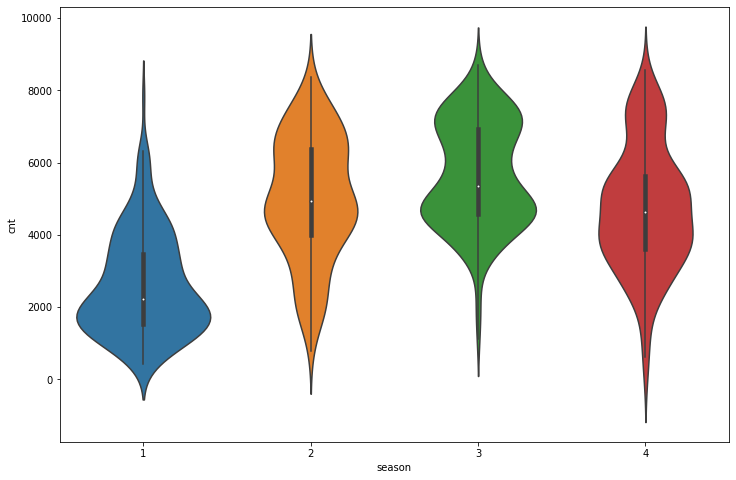

In [22]:
sns.violinplot(data['season'], data['cnt']);

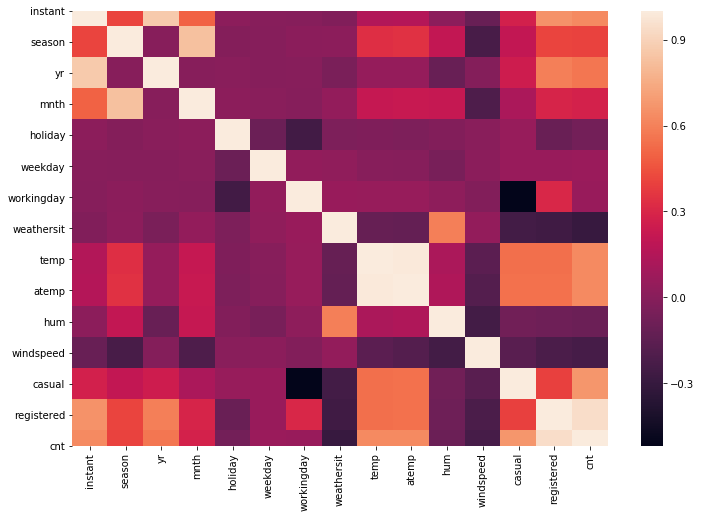

In [23]:
sns.heatmap(data.corr());

ValueError: num must be 1 <= num <= 12, not 13

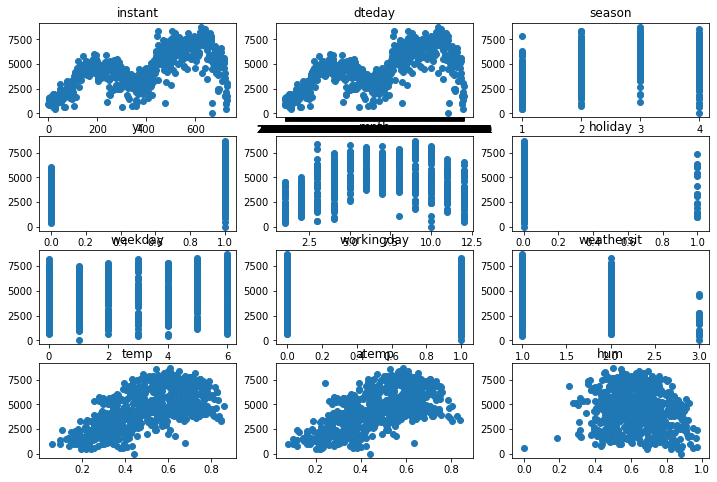

In [24]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    plt.scatter(data[col],data['cnt'])
    plt.title(col)

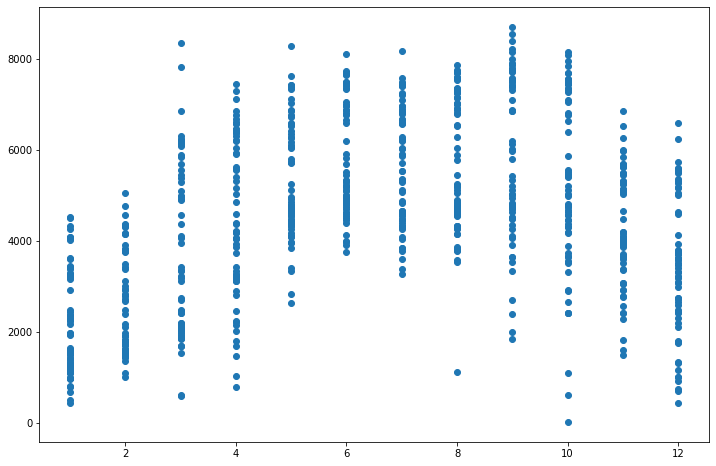

In [25]:
plt.scatter(data.mnth, data.cnt)

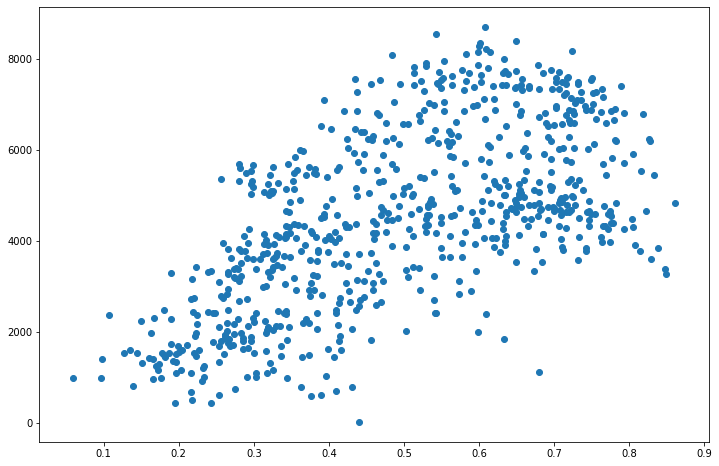

In [26]:
plt.scatter(data.temp, data.cnt)

### 4.	X – все кроме cnt, y - cnt

In [68]:
X = data.drop(['cnt', 'dteday'], axis = 1)
y = data['cnt']

### 5.	Разбить выборку в соотношении 70 на 30 (%)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### 6.	Провести стандартизацию X

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [72]:
X_train.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
93,94,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381
267,268,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466
162,163,2,0,6,0,0,0,1,0.692500,0.643325,0.747917,0.163567,1467,2993
605,606,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654


In [73]:
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [50]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

### 7.	Написать функцию обучения модели и вывода MSE, coef, R^2

In [75]:
def table_model(model, X_train, X_test, y_train, y_test, feature_names):
    
    model.fit(X_train, y_train)
    print(mean_squared_error(y_test, model.predict(X_test)))
    print(r2_score(y_test, model.predict(X_test)))
    print(pd.DataFrame(model.coef_, feature_names, columns=['coef']).sort_values(by='coef', ascending=False))

### 8.	Обучить X_train методами линейной регрессии, Lasso, LassoCV, ridge, ridgeCV


In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
linreg = LinearRegression()
lasso = Lasso(random_state = 42)
ridge = Ridge(random_state = 42)
lasso_cv = LassoCV(random_state = 42)
ridge_cv = RidgeCV()

In [80]:
feature_names = X.columns

### 9.	Вывести в виде таблицы MSE, coef, R^2 соответствующих методов обучения.

In [81]:
table_model(linreg, X_train, X_test, y_train, y_test, feature_names)

4.03344546416482e-24
1.0
                    coef
registered  1.579736e+03
casual      7.093211e+02
yr          2.216893e-12
weathersit  1.538325e-12
temp        7.105427e-13
holiday     6.199485e-13
mnth        3.410605e-13
windspeed   2.060574e-13
weekday     1.476597e-14
season      0.000000e+00
hum        -9.769963e-14
workingday -5.042355e-13
atemp      -1.023182e-12
instant    -2.659316e-12


In [82]:
table_model(lasso, X_train, X_test, y_train, y_test, feature_names)

1.1777558448357066
0.9999996483923437
                  coef
registered  1579.02904
casual       708.60250
instant        0.00000
season         0.00000
yr             0.00000
mnth           0.00000
holiday       -0.00000
weekday        0.00000
workingday    -0.00000
weathersit    -0.00000
temp           0.00000
atemp          0.00000
hum           -0.00000
windspeed     -0.00000


In [84]:
table_model(ridge, X_train, X_test, y_train, y_test, feature_names)

48.72260137935199
0.9999854543369445
                   coef
registered  1563.373445
casual       708.697862
yr            11.028448
season         4.929425
workingday     3.787944
temp           3.500731
atemp          2.878207
weekday        0.801706
mnth           0.444195
holiday       -0.996568
hum           -1.425295
windspeed     -1.801673
instant       -2.172303
weathersit    -2.585567


In [83]:
table_model(lasso_cv, X_train, X_test, y_train, y_test, feature_names)

4.097187762181375
0.9999987768240821
                   coef
registered  1578.410095
casual       707.989210
instant        0.000000
season         0.000000
yr             0.000000
mnth           0.000000
holiday       -0.000000
weekday        0.000000
workingday    -0.000000
weathersit    -0.000000
temp           0.000000
atemp          0.000000
hum           -0.000000
windspeed     -0.000000


C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [85]:
table_model(ridge_cv, X_train, X_test, y_train, y_test, feature_names)

0.505206542070219
0.999999849175456
                   coef
registered  1578.064859
casual       709.259541
yr             2.016487
mnth           0.543665
season         0.509754
workingday     0.388971
temp           0.376570
atemp          0.270652
weekday        0.081081
holiday       -0.101776
hum           -0.137475
windspeed     -0.179484
weathersit    -0.270636
instant       -1.257432


### 10.	Построить графики обученных и реальных данных ???

In [106]:
y_pred = lars.predict(X_test)

In [107]:
to_plot = pd.DataFrame()
to_plot['y_pred'] = y_pred
to_plot['y_real'] = y_test

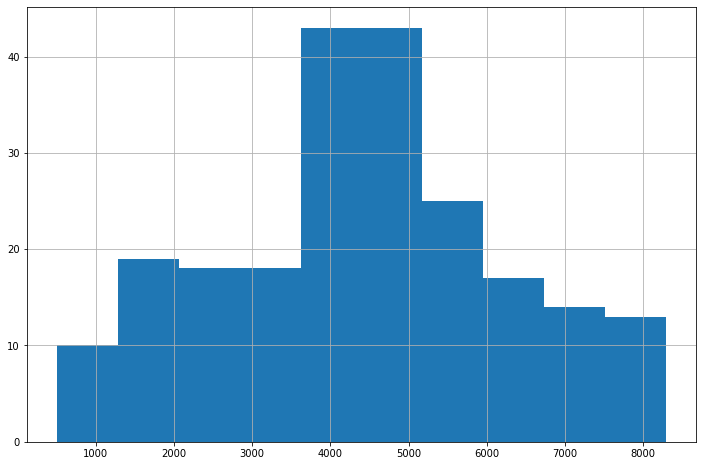

In [108]:
to_plot.y_pred.hist()

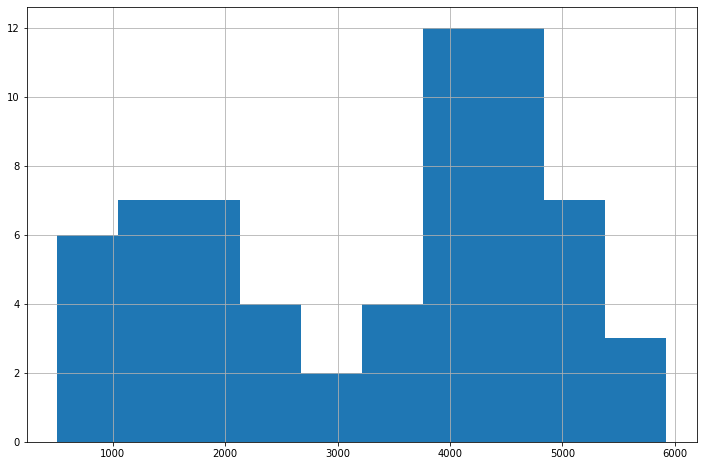

In [109]:
to_plot.y_real.hist()

### Придумать свою модель обучения, предварительно обработав данные и вывести MSE, coef, R^2

In [102]:
from sklearn.linear_model import Lars

In [103]:
lars = Lars()

In [104]:
table_model(lars, X_train, X_test, y_train, y_test, feature_names)

9.249383213092946e-25
1.0
                   coef
registered  1579.735638
casual       709.321097
instant        0.000000
season         0.000000
yr             0.000000
mnth           0.000000
holiday        0.000000
weekday        0.000000
workingday     0.000000
weathersit     0.000000
temp           0.000000
atemp          0.000000
hum            0.000000
windspeed      0.000000
